Importing the dependencies

In [5]:
!pip install xgboost

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

Data Collection and Pre-processing

In [7]:
data = pd.read_csv("/content/train (3).csv")

In [8]:
data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [9]:
data.shape

(90785, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90785 entries, 0 to 90784
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           90785 non-null  int64  
 1   Podcast_Name                 90785 non-null  object 
 2   Episode_Title                90785 non-null  object 
 3   Episode_Length_minutes       80237 non-null  float64
 4   Genre                        90785 non-null  object 
 5   Host_Popularity_percentage   90785 non-null  float64
 6   Publication_Day              90785 non-null  object 
 7   Publication_Time             90785 non-null  object 
 8   Guest_Popularity_percentage  73021 non-null  float64
 9   Number_of_Ads                90785 non-null  float64
 10  Episode_Sentiment            90785 non-null  object 
 11  Listening_Time_minutes       90784 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 8.3+ MB


In [11]:
data.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,10548
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,17764
Number_of_Ads,0


In [12]:
sns.set_theme()

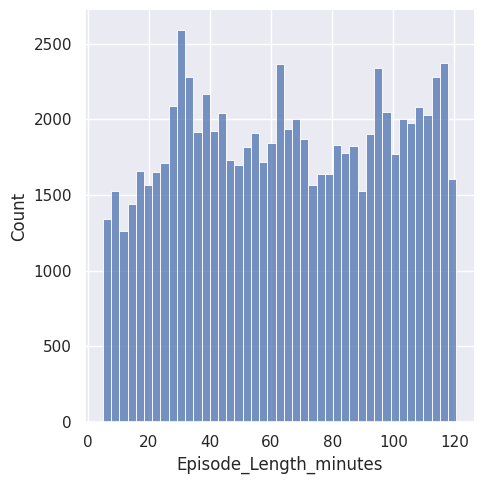

In [13]:
sns.displot(data = data, x = "Episode_Length_minutes")

In [14]:
data["Episode_Length_minutes"] = data["Episode_Length_minutes"].fillna(data["Episode_Length_minutes"].median())

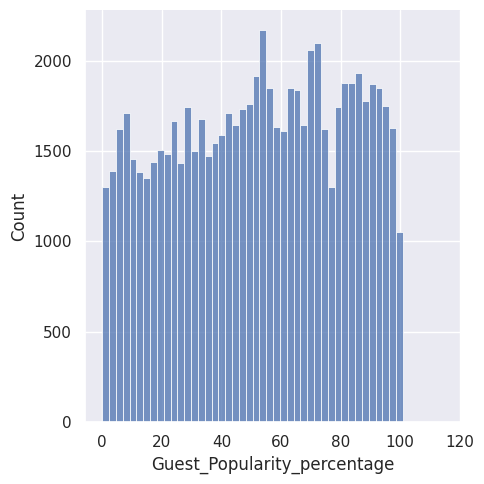

In [15]:
sns.displot(data = data, x = "Guest_Popularity_percentage")

In [16]:
data["Guest_Popularity_percentage"] = data["Guest_Popularity_percentage"].fillna(data["Guest_Popularity_percentage"].median())

In [17]:
data.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0


In [18]:
data = data.dropna(how = 'any')

In [19]:
data.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0


In [20]:
data.head(2)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,64.05,True Crime,74.81,Thursday,Night,53.32,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241


In [21]:
data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [22]:
numerical_features = ['Listening_Time_minutes','Guest_Popularity_percentage',"Host_Popularity_percentage","Episode_Length_minutes"]

for col in data.columns:
  if col not in numerical_features:
    print(col, data[col].unique())
    print('-'*50)

id [    0     1     2 ... 90781 90782 90783]
--------------------------------------------------
Podcast_Name ['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']
--------------------------------------------------
Episode_Title ['Episode 98' 'Episode 26' 'Episode 16' 'Episode 45' 'Ep

Label Encoding

In [23]:
object_data = data.select_dtypes(include = "object").columns

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
for columns in object_data:
  label_encode = LabelEncoder()
  data[columns] = label_encode.fit_transform(data[columns])


In [26]:
data.head(2)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98,64.05,9,74.81,4,3,53.32,0.0,2,31.41998
1,1,24,19,119.80,1,66.95,2,0,75.95,2.0,0,88.01241


Splitting the data into features and target

In [27]:
X = data.drop(columns = ["id","Listening_Time_minutes"], axis = 1)
Y = data["Listening_Time_minutes"]

In [48]:
X.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,34,98,64.05,9,74.81,4,3,53.32,0.0,2
1,24,19,119.80,1,66.95,2,0,75.95,2.0,0
2,40,8,73.90,2,69.97,5,1,8.97,0.0,0
3,10,40,67.17,8,57.22,1,2,78.70,2.0,2
4,31,85,110.51,3,80.07,1,0,58.68,3.0,1


In [28]:
print(X)

       Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  \
0                34             98                   64.05      9   
1                24             19                  119.80      1   
2                40              8                   73.90      2   
3                10             40                   67.17      8   
4                31             85                  110.51      3   
...             ...            ...                     ...    ...   
90779            32             29                  119.24      0   
90780            35             71                  112.21      6   
90781            24             23                   16.09      1   
90782            16             68                   29.60      8   
90783            42             69                  101.58      8   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                           74.81                4                 3   
1                          

In [29]:
print(Y)

0        31.41998
1        88.01241
2        44.92531
3        46.27824
4        75.61031
           ...   
90779    98.52310
90780    72.74038
90781     3.68258
90782    17.91833
90783    85.22734
Name: Listening_Time_minutes, Length: 90784, dtype: float64


Train Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(90784, 10) (72627, 10) (18157, 10)


Model Selection

In [35]:
models = [LinearRegression(), DecisionTreeRegressor(), XGBRegressor()]

In [36]:
def compare_cross_val_score():
  for model in models:
    cv_score = cross_val_score(model, X,Y, cv = 5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy,2)
    print("The score for ",model, "is", mean_accuracy)
    print('-'*50)

In [37]:
compare_cross_val_score()

The score for  LinearRegression() is 75.43
--------------------------------------------------
The score for  DecisionTreeRegressor() is 51.02
--------------------------------------------------
The score for  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) is 75.73
---------------------------------

In [38]:
model = XGBRegressor()

In [40]:
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [41]:
regressor = RandomizedSearchCV(model, hyperparameters, cv = 5, random_state = 42)

In [42]:
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [43]:
regressor.best_params_

{'n_estimators': 100, 'learning_rate': 0.1}

Using XGBRegressor with 'n_estimators': 100, 'learning_rate': 0.1

In [44]:
model = XGBRegressor( n_estimators = 100, learning_rate = 0.1)

In [45]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evalution

In [46]:
X_train_prediction = model.predict(X_train)
X_train_rsme = root_mean_squared_error(Y_train, X_train_prediction)
print("The RMSE for training data is", X_train_rsme)

The RMSE for training data is 12.762162224449646


In [47]:
X_test_prediction = model.predict(X_test)
X_test_rsme = root_mean_squared_error(Y_test, X_test_prediction)
print("The RMSE for testing data is", X_test_rsme)

The RMSE for testing data is 13.135308942185802


Building a predictive system

In [49]:
input_data = (40,8,73.90,2,69.97,5,1,8.97,0.0,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print("The listening time for the podcast is ",prediction)

The listening time for the podcast is  [54.627052]
